In [1]:
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'cv2'

In [3]:
!git clone https://github.com/toelt-llc/HSLU-Computer-Vision-Lab-Student-Version

Cloning into 'HSLU-Computer-Vision-Lab-Student-Version'...
remote: Enumerating objects: 5032, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5032 (delta 0), reused 0 (delta 0), pack-reused 5029
Receiving objects: 100% (5032/5032), 990.30 MiB | 6.52 MiB/s, done.
Resolving deltas: 100% (147/147), done.
Checking out files: 100% (5017/5017), done.


In [17]:
# Walk through Kather_texture directory and list number of files
for dirpath, dirnames, filenames in os.walk("HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 8 directories and 1 images in 'HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/'.
There are 0 directories and 625 images in 'HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/02_STROMA'.
There are 0 directories and 625 images in 'HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/06_MUCOSA'.
There are 0 directories and 625 images in 'HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/05_DEBRIS'.
There are 0 directories and 625 images in 'HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/01_TUMOR'.
There are 0 directories and 625 images in 'HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/03_COMPLEX'.
There are 0 directories and 625 images in 'HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/08_EMPTY'.
There are 0 directories and 625 images in 'HSL

In [18]:
base_dir = 'HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000'
df = pd.DataFrame({'path': glob(os.path.join(base_dir, '*','*.tif'))})

In [19]:
df['file_id'] = df['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
df['cell_type'] = df['path'].map(lambda x: os.path.basename(os.path.dirname(x)))
df['cell_type_idx'] = df['cell_type'].map(lambda x: int(x. split('_')[0]))
df['cell_type'] = df['cell_type'].map(lambda x: x.split('_')[1])
df['full_image_name'] = df['file_id'].map(lambda x: x.split('_ Row')[0])
df['full_image_row'] = df['file_id'].map(lambda x: int(x.split('_')[-3]))
df['full_image_col'] = df['file_id'].map(lambda x: int(x.split('_')[-1]))
df.head()

path  \
0  HSLU-Computer-Vision-Lab-Student-Version/data/...   
1  HSLU-Computer-Vision-Lab-Student-Version/data/...   
2  HSLU-Computer-Vision-Lab-Student-Version/data/...   
3  HSLU-Computer-Vision-Lab-Student-Version/data/...   
4  HSLU-Computer-Vision-Lab-Student-Version/data/...   

                                          file_id cell_type  cell_type_idx  \
0    14389_CRC-Prim-HE-07_026.tif_Row_751_Col_151    STROMA              2   
1  1163A_CRC-Prim-HE-05_009b.tif_Row_751_Col_1201    STROMA              2   
2    118E_CRC-Prim-HE-02_015.tif_Row_301_Col_3601    STROMA              2   
3       12238_CRC-Prim-HE-09.tif_Row_151_Col_2551    STROMA              2   
4    100A6_CRC-Prim-HE-02_029.tif_Row_601_Col_301    STROMA              2   

                                  full_image_name  full_image_row  \
0    14389_CRC-Prim-HE-07_026.tif_Row_751_Col_151             751   
1  1163A_CRC-Prim-HE-05_009b.tif_Row_751_Col_1201             751   
2    118E_CRC-Prim-HE-02_015.tif_Row_301_Col_3601             301   
3       12238_CRC-Prim-HE-09.tif_Row_151_Col_2551             151   
4    100A6_CRC-Prim-HE-02_029.tif_Row_601_Col_301             601   

   full_image_col  
0             151  
1            1201  
2            3601  
3            2551  
4             301

In [20]:
df['image'] = df['path'].map(plt.imread)

In [21]:
df['cell_type'].unique()

array(['STROMA', 'MUCOSA', 'DEBRIS', 'TUMOR', 'COMPLEX', 'EMPTY',
       'LYMPHO', 'ADIPOSE'], dtype=object)

In [22]:
df.shape

(5000, 8)

In [23]:
df['cell_type'].value_counts()

STROMA     625
MUCOSA     625
DEBRIS     625
TUMOR      625
COMPLEX    625
EMPTY      625
LYMPHO     625
ADIPOSE    625
Name: cell_type, dtype: int64

In [24]:
df['full_image_name'][df.duplicated('full_image_name')]

Series([], Name: full_image_name, dtype: object)

In [25]:
df['full_image_name'].nunique()

5000

In [27]:
np.random.seed(42)

def select_random_samples(n):
  """
  Select n random samples per cell type.
  Returns a pd.DataFrame of RGB values as well as the cell type
  for every random sample.
  """
  cell_types = df['cell_type'].unique()

  sample_list = []
  for cell in cell_types:
    rand_sample = np.random.choice(625, n)
    for sample in rand_sample:
      cell_df = df[df['cell_type'] == cell].iloc[sample,:]
      cell_type = cell_df['cell_type']
      image = cell_df['image']
      sample_list.append({'cell_type':cell_type, 'image':image})

  return pd.DataFrame(sample_list)

viz_df = select_random_samples(5)
viz_df

cell_type                                              image
0     STROMA  [[[97, 46, 85], [185, 85, 129], [209, 109, 153...
1     STROMA  [[[123, 34, 74], [122, 33, 73], [120, 34, 73],...
2     STROMA  [[[220, 127, 169], [230, 148, 168], [227, 145,...
3     STROMA  [[[223, 115, 149], [220, 112, 146], [213, 103,...
4     STROMA  [[[200, 142, 177], [177, 118, 158], [160, 101,...
5     MUCOSA  [[[174, 127, 153], [181, 126, 158], [184, 129,...
6     MUCOSA  [[[177, 160, 178], [225, 208, 226], [240, 224,...
7     MUCOSA  [[[160, 79, 132], [166, 85, 138], [161, 96, 13...
8     MUCOSA  [[[165, 134, 176], [166, 135, 177], [170, 139,...
9     MUCOSA  [[[98, 47, 98], [102, 54, 102], [114, 66, 114]...
10    DEBRIS  [[[235, 195, 219], [234, 217, 223], [241, 224,...
11    DEBRIS  [[[160, 53, 79], [162, 55, 81], [161, 60, 84],...
12    DEBRIS  [[[150, 106, 155], [151, 107, 156], [142, 94, ...
13    DEBRIS  [[[213, 180, 173], [227, 194, 187], [213, 183,...
14    DEBRIS  [[[114, 32, 70], [122, 40, 78], [115, 33, 71],...
15     TUMOR  [[[200, 135, 173], [216, 168, 192], [241, 193,...
16     TUMOR  [[[173, 70, 109], [112, 31, 72], [107, 26, 67]...
17     TUMOR  [[[94, 36, 85], [104, 37, 89], [104, 37, 89], ...
18     TUMOR  [[[213, 176, 202], [163, 126, 152], [140, 77, ...
19     TUMOR  [[[95, 30, 72], [115, 50, 92], [123, 62, 93], ...
20   COMPLEX  [[[120, 32, 82], [117, 44, 90], [118, 45, 91],...
21   COMPLEX  [[[244, 232, 236], [243, 231, 235], [242, 230,...
22   COMPLEX  [[[124, 41, 85], [132, 40, 63], [129, 37, 60],...
23   COMPLEX  [[[152, 52, 73], [163, 63, 84], [137, 52, 91],...
24   COMPLEX  [[[61, 39, 86], [54, 32, 79], [76, 33, 76], [8...
25     EMPTY  [[[244, 245, 247], [244, 245, 247], [244, 245,...
26     EMPTY  [[[238, 240, 239], [238, 240, 239], [243, 245,...
27     EMPTY  [[[241, 243, 242], [241, 243, 242], [241, 243,...
28     EMPTY  [[[243, 243, 241], [243, 243, 241], [242, 242,...
29     EMPTY  [[[243, 247, 250], [243, 247, 250], [242, 247,...
30    LYMPHO  [[[60, 31, 88], [80, 51, 108], [81, 48, 101], ...
31    LYMPHO  [[[110, 71, 136], [130, 76, 126], [120, 66, 11...
32    LYMPHO  [[[130, 44, 91], [89, 29, 75], [83, 23, 69], [...
33    LYMPHO  [[[244, 224, 225], [159, 124, 164], [101, 66, ...
34    LYMPHO  [[[198, 99, 130], [214, 112, 142], [223, 121, ...
35   ADIPOSE  [[[244, 244, 242], [244, 244, 242], [244, 244,...
36   ADIPOSE  [[[231, 218, 235], [228, 215, 232], [226, 213,...
37   ADIPOSE  [[[246, 242, 243], [246, 242, 241], [246, 242,...
38   ADIPOSE  [[[221, 217, 216], [224, 220, 219], [225, 224,...
39   ADIPOSE  [[[242, 242, 240], [242, 242, 240], [243, 243,...

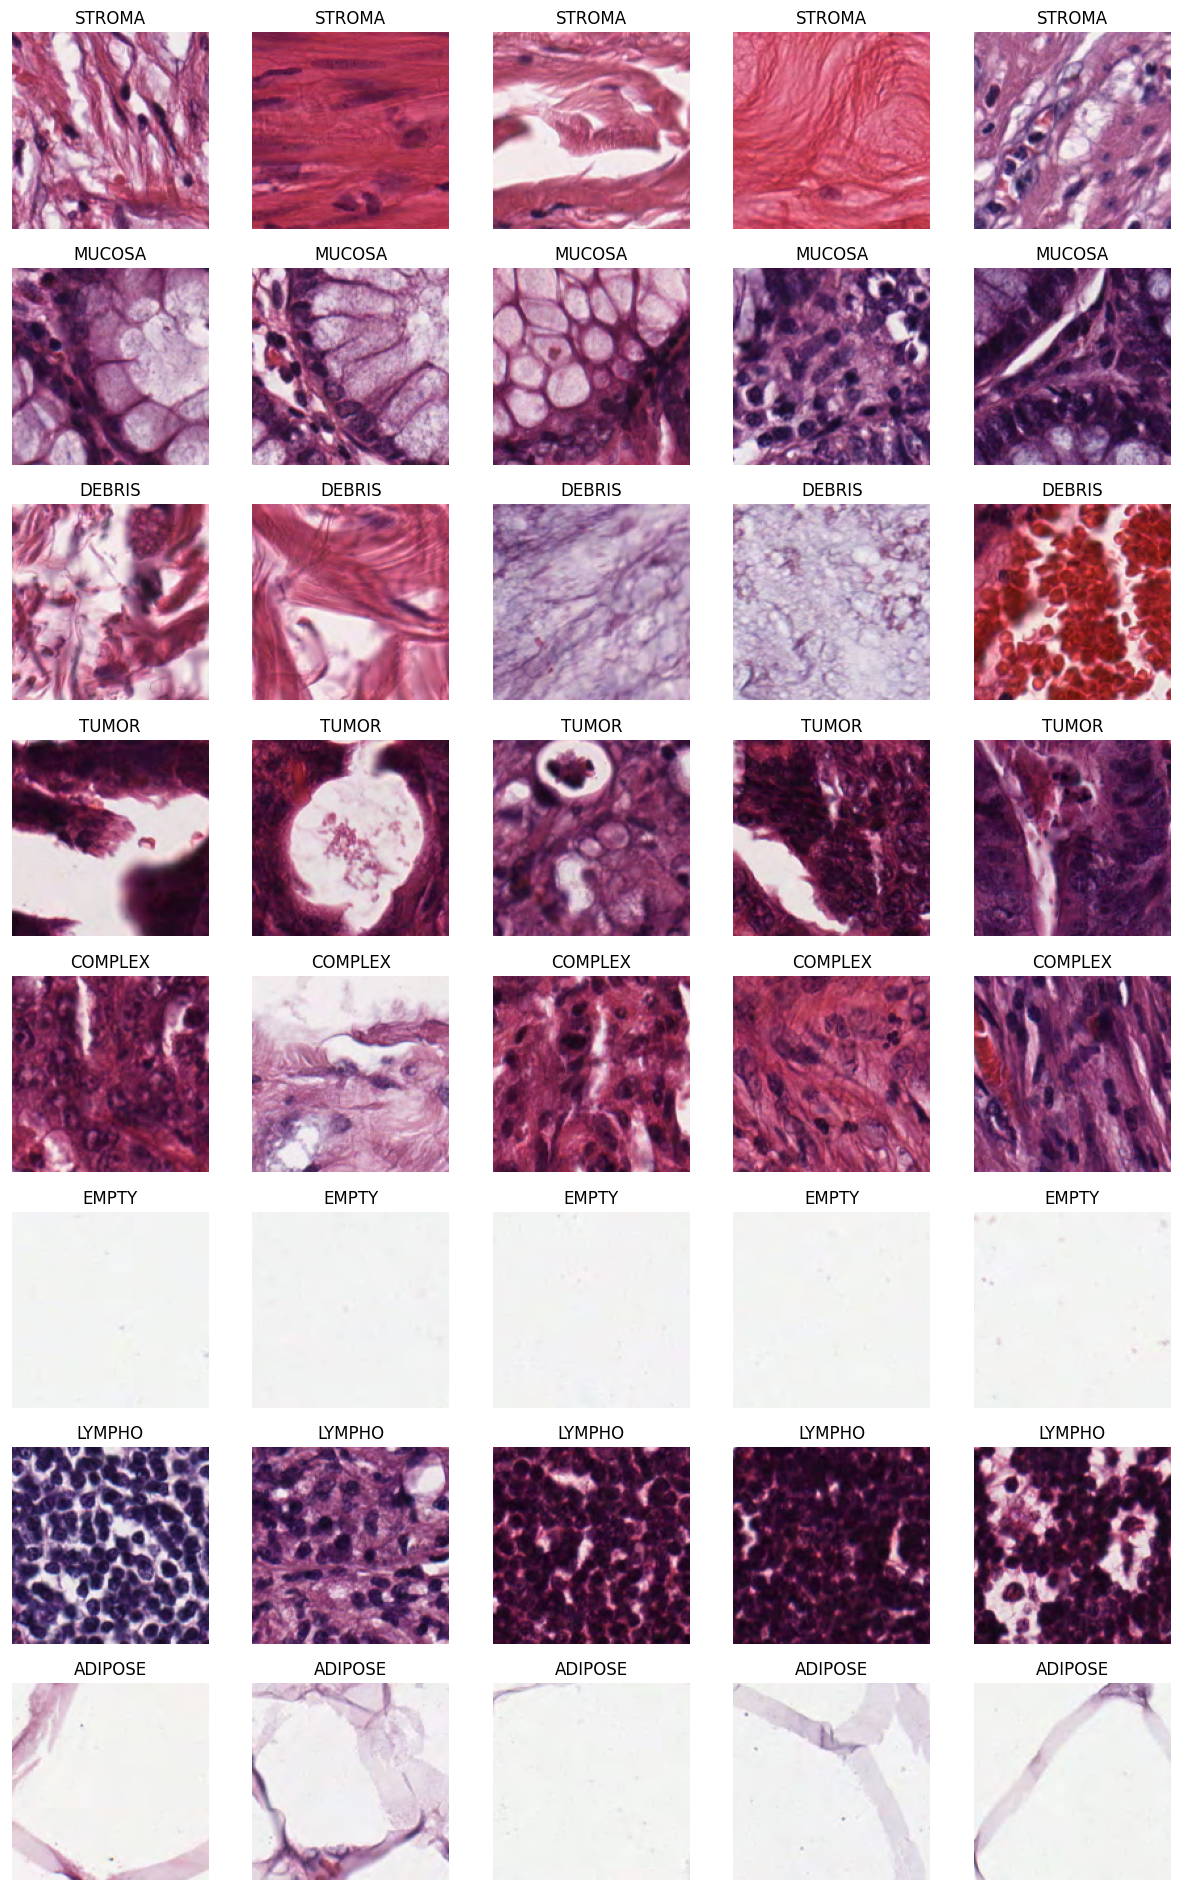

In [28]:
rows = 8
columns = 5

fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*3, rows*3))
for row in range(rows):
  for col in range(columns):
    ax[row, col].axis('off')

for num in range(40):

  fig.add_subplot(rows, columns, num+1)

  plt.imshow(viz_df['image'][num])
  plt.axis('off')
  plt.title(viz_df['cell_type'][num])

In [29]:
# Histograms of RGB for samples
cell_hist_df = select_random_samples(1)
cell_hist_df

cell_type                                              image
0    STROMA  [[[209, 114, 146], [209, 115, 149], [211, 117,...
1    MUCOSA  [[[153, 96, 149], [138, 80, 131], [140, 82, 13...
2    DEBRIS  [[[184, 157, 188], [177, 150, 181], [181, 162,...
3     TUMOR  [[[155, 98, 143], [167, 110, 155], [191, 135, ...
4   COMPLEX  [[[207, 123, 183], [163, 79, 139], [175, 94, 1...
5     EMPTY  [[[245, 245, 247], [244, 244, 246], [244, 244,...
6    LYMPHO  [[[60, 19, 51], [50, 9, 41], [30, 4, 29], [28,...
7   ADIPOSE  [[[244, 244, 244], [244, 244, 244], [244, 244,...

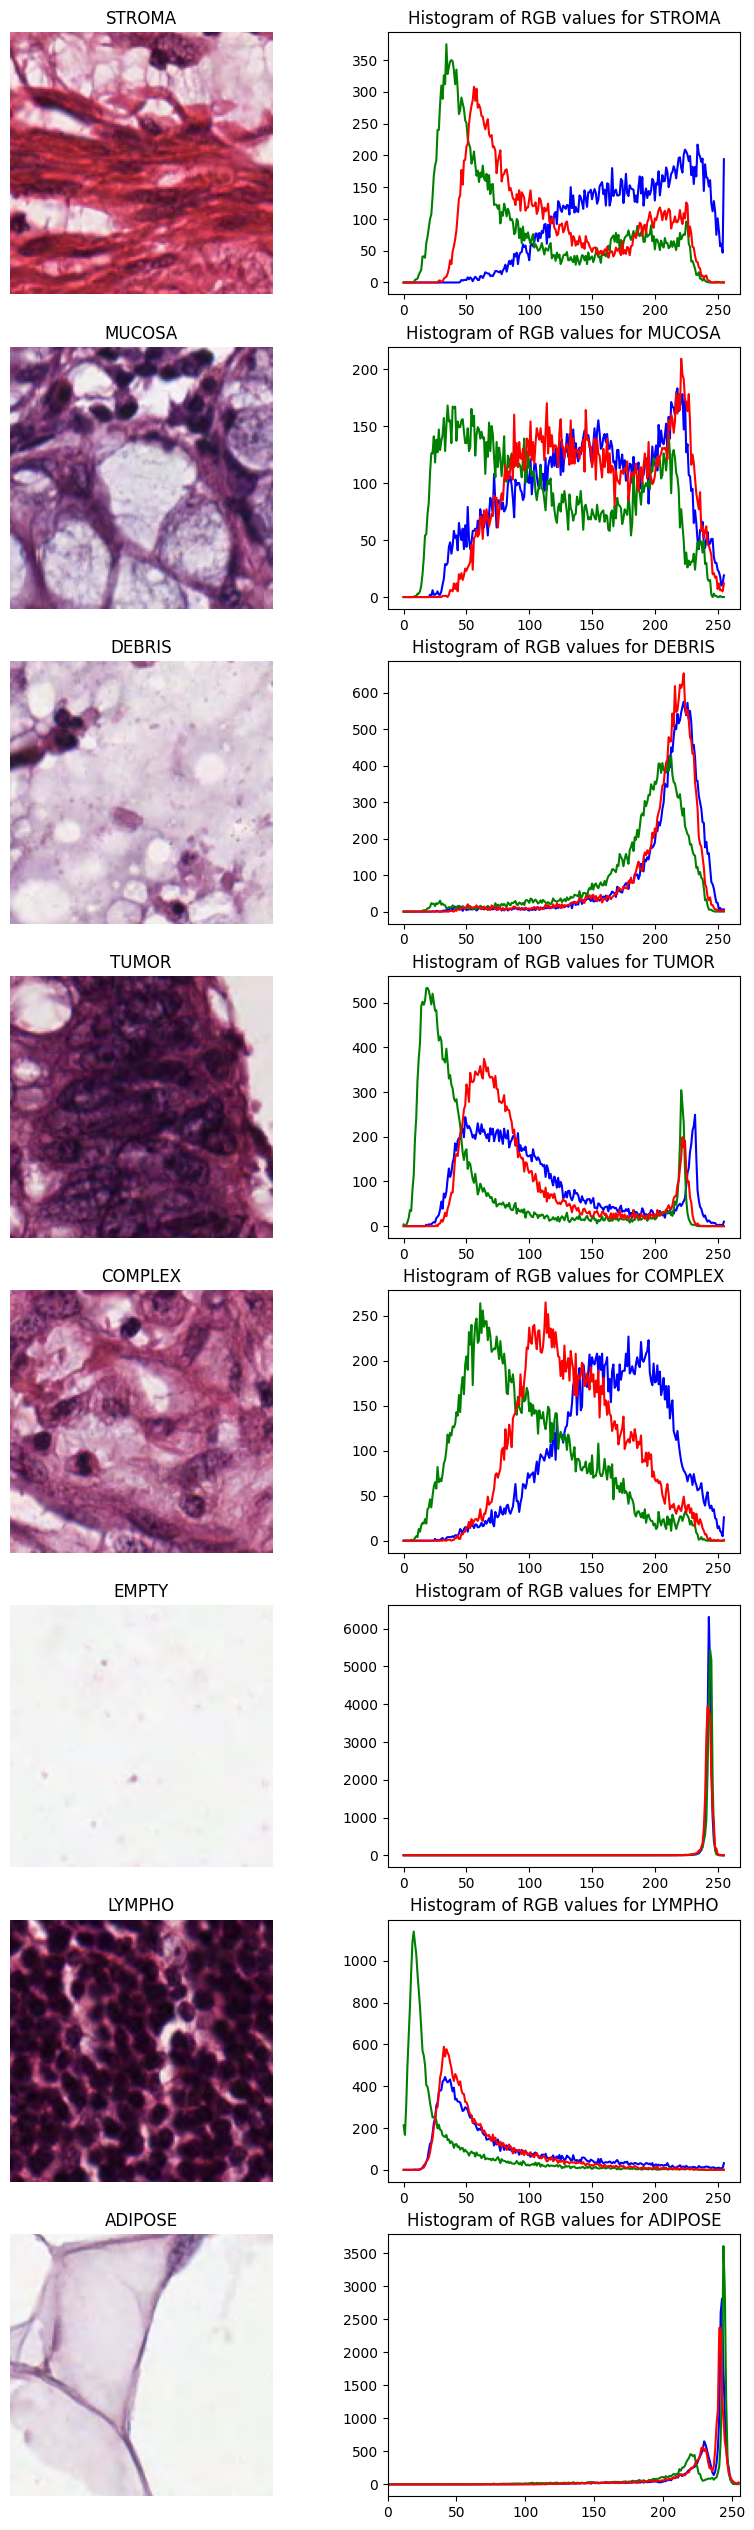

In [30]:
color = ('b', 'g', 'r')

rows, cols = 8, 2
fig, ax = plt.subplots(rows, cols,
                       figsize=(columns*2, rows*4))

for row in range(rows):
    ax[row, 0].axis('off')

for idx in range(8):
  img = cell_hist_df.iloc[idx, 1]
  ax[idx, 0].imshow(img)
  ax[idx, 0].title.set_text(cell_hist_df.iloc[idx, 0])
  for channel, col in enumerate(color):
    hist_channel = cv2.calcHist([img], [channel], None, [256], [0,256])
    ax[idx, 1].plot(hist_channel, color=col)
    ax[idx, 1].title.set_text(f"Histogram of RGB values for {cell_hist_df.iloc[idx, 0]}")
    plt.xlim([0,256])

In [ ]:
df_label = pd.get_dummies(df['cell_type'])
print(df_label)

      ADIPOSE  COMPLEX  DEBRIS  EMPTY  LYMPHO  MUCOSA  STROMA  TUMOR
0           0        0       0      0       0       0       0      1
1           0        0       0      0       0       1       0      0
2           0        0       1      0       0       0       0      0
3           0        0       0      0       1       0       0      0
4           0        0       0      0       1       0       0      0
...       ...      ...     ...    ...     ...     ...     ...    ...
4995        0        0       0      1       0       0       0      0
4996        0        0       0      0       0       1       0      0
4997        0        0       1      0       0       0       0      0
4998        0        0       0      0       0       0       0      1
4999        0        0       0      0       0       1       0      0

[5000 rows x 8 columns]


In [ ]:
data=np.array(df['image'].tolist())

In [ ]:

x, x_test, y, y_test = train_test_split(data, df_label, test_size=0.2,train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25,train_size =0.75)


In [ ]:
print('1- Training set:', x_train.shape, y_train.shape)
print('2- Validation set:', x_val.shape, y_val.shape)
print('3- Testing set:', x_test.shape, y_test.shape)

1- Training set: (3000, 150, 150, 3) (3000, 8)
2- Validation set: (1000, 150, 150, 3) (1000, 8)
3- Testing set: (1000, 150, 150, 3) (1000, 8)


In [ ]:
cell_types = df['cell_type'].unique()

# split data based on lables:
df_dic = {cell: pd.DataFrame() for cell in cell_types}

for key in df_dic.keys():
  df_dic[key] = df[df.cell_type == key][:]
  df_dic[key].reset_index(drop=True, inplace=True)

In [ ]:
def avg_img(cell_type, power=20):

  """Get an average picture of a category, contrasts amplified."""

  list_tumor = list(df_dic[cell_type]['image'])
  sum_tumor = np.sum(list_tumor, axis=0) / len(list_tumor)
  pw_mat = np.full((150, 150, 3), power)
  pw_tumor = np.power(sum_tumor, pw_mat)
  #print(pw_tumor)
  pw_tumor = pw_tumor / np.max(pw_tumor)
  return(pw_tumor)

In [ ]:
df_avg = pd.DataFrame()
typ = []
img = []

for i in cell_types:
  typ.append(i)
  img.append(avg_img(i))

df_avg['cell_type'] = typ
df_avg['image'] = img


#df_avg = df_avg[df_avg['cell_type'] != 'EMPTY']
df_avg.head(8)


cell_type                                              image
0     EMPTY  [[[0.937265777693935, 0.969748392130313, 0.963...
1    MUCOSA  [[[0.2631741078779808, 5.7926618487456956e-05,...
2    LYMPHO  [[[0.3667367474678757, 4.592588736001228e-06, ...
3   COMPLEX  [[[0.44492876067079845, 7.286824839169167e-07,...
4     TUMOR  [[[0.5243846560287257, 2.0944197122682597e-06,...
5   ADIPOSE  [[[0.8139018472875282, 0.45185747598365744, 0....
6    DEBRIS  [[[0.5155232126945101, 0.00010130553472670708,...
7    STROMA  [[[0.6283135018107394, 4.9634241664212705e-06,...

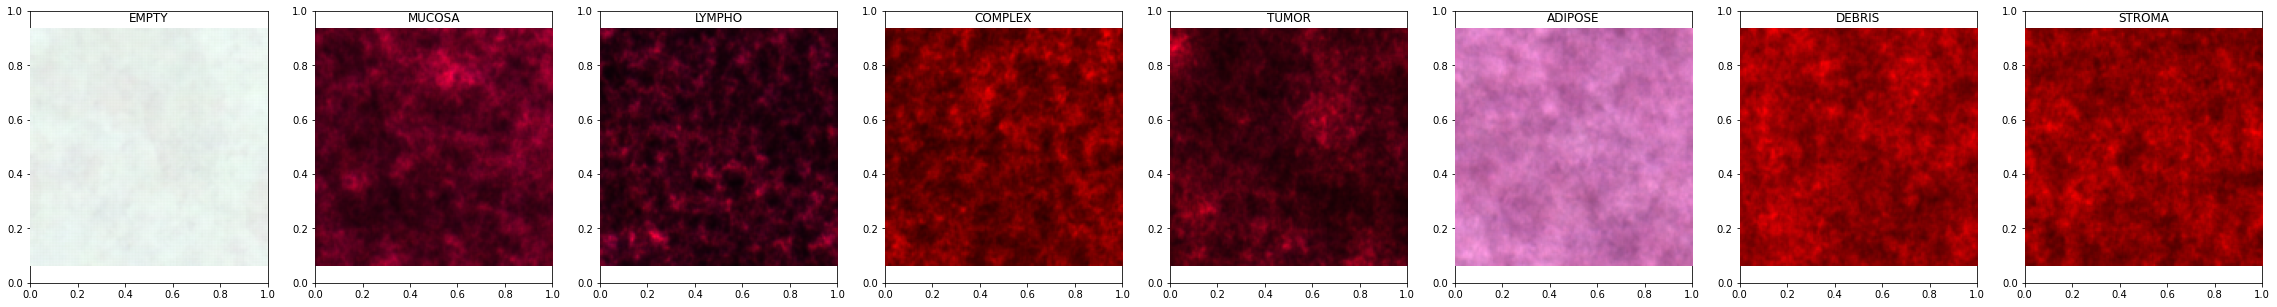

In [ ]:
rows = 1
columns = 8

fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))

for num in range(8):

  fig.add_subplot(rows, columns, num+1)

  plt.imshow(df_avg['image'][num])
  plt.axis('off')
  plt.title(df_avg['cell_type'][num])

Test test

In [1]:
## Test the second